📌 Persiapan: Import Librarypip list
!pip list

In [1]:
!pip list


Package                   Version
------------------------- --------------
altair                    5.5.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.9.0
CacheControl              0.14.2
cachetools                5.5.0
certifi                   2025.6.15
cffi                      1.17.0
charset-normalizer        3.3.2
click                     8.1.8
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.2
cryptography              44.0.0
cycler                    0.12.1
dash-core-components      2.0.0
dash-html-components      2.0.0
dash-table                5.0.0
debugpy                   1.8.5
decorator                 5.1.1
defusedxml      


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# Data & Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# SMOTE (Imbalanced Data)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Simpan model
import joblib


In [19]:
# Load dataset
df = pd.read_csv("../data/Ulasan_Penelitian_Fixkali_Cleaned.csv")

# Normalisasi nama kolom
df.columns = df.columns.str.lower().str.strip()

# Drop baris kosong
df.dropna(subset=['ulasan_bersih', 'label'], inplace=True)

# Konversi label ke numerik
if df['label'].dtype == 'object':
    label_map = {'negatif': 0, 'positif': 1}
    df['label'] = df['label'].map(label_map)
else:
    df['label'] = df['label'].astype(int)

# Lihat sekilas data
df.head()


,user_name,rating,ulasan,date,label,sentiment,ulasan_bersih
0,Ayun Hawa,1,"Aneh, voucher goride gocar gamuncul semua pada...",2024-01-31 16:39:09,0,Negative,aneh voucher goride tidak muncul voucher muncu...
1,supri yanto,5,Kok buka aplikasi goride hilang2 mulu...,2024-01-31 13:37:36,0,Negative,buka aplikasi goride hilang melulu
2,Ruwy Masyari,5,Gojek keren bisa pesen sekalian 2 goride satu ...,2024-01-30 14:29:51,1,Positive,gojek keren bisa pesan goride terima kasih gojek
3,Achmad Sayid,3,Sekarang udah mahal goride dan gofood,2024-01-30 09:18:49,0,Negative,mahal goride
4,Resa Agustin,1,Kesalahan dari sistem gojek saldo Gopay kepoto...,2024-01-29 23:35:04,0,Negative,salah sistem gojek saldo gopay potong otomatis...


In [4]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# 
# # TF-IDF Feature Extraction
# tfidf = TfidfVectorizer(
#     ngram_range=(1,2),
#     max_features=1000,
#     min_df=2,
#     max_df=0.95,
#     sublinear_tf=True
# )
# 
# X_tfidf = tfidf.fit_transform(df['ulasan_bersih'])
# 
# # Konversi hasil TF-IDF menjadi DataFrame
# tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
# 
# # Tampilkan 5 baris pertama
# tfidf_df.head()

In [20]:
X = df['ulasan_bersih']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 593
Jumlah data uji: 66


In [21]:
# Pipeline machine learning
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=1000, sublinear_tf=True)),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
])

In [22]:
# Hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    pipeline, param_grid=param_grid,
    scoring='f1', cv=5, verbose=1, n_jobs=-1
)

# Latih model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=1000,
                                                        ngram_range=(1, 2),
                                                        sublinear_tf=True)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='f1', verbose=1)

Akurasi: 0.8787878787878788
Best Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        48
           1       0.86      0.67      0.75        18

    accuracy                           0.88        66
   macro avg       0.87      0.81      0.83        66
weighted avg       0.88      0.88      0.87        66



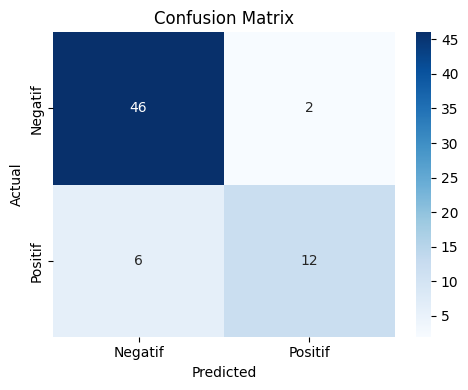

In [23]:
y_pred = grid_search.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


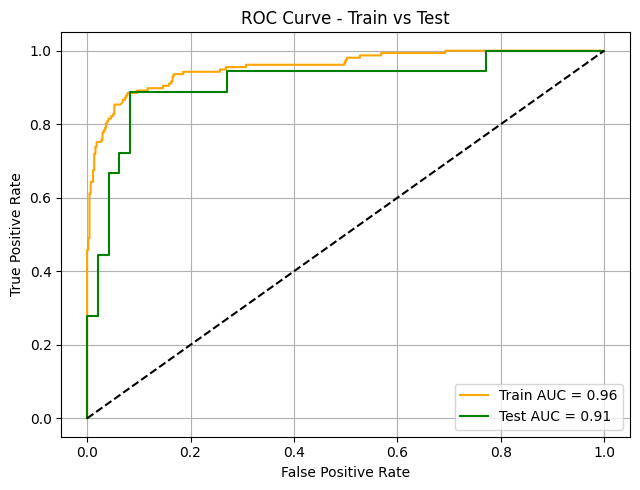

In [24]:
train_probs = grid_search.predict_proba(X_train)[:, 1]
test_probs = grid_search.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(6.5, 5))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}', color='orange')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Train vs Test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [25]:
pipeline_terbaik = grid_search.best_estimator_
cv_scores = cross_val_score(pipeline_terbaik, X, y, cv=5, scoring='f1_macro')

print("Cross-Validation F1 Macro Scores:", cv_scores)
print("Mean F1 Score:", round(cv_scores.mean(), 4))
print("Standard Deviation:", round(cv_scores.std(), 4))


Cross-Validation F1 Macro Scores: [0.80559647 0.86134454 0.83136378 0.78431373 0.7219527 ]
Mean F1 Score: 0.8009
Standard Deviation: 0.0471


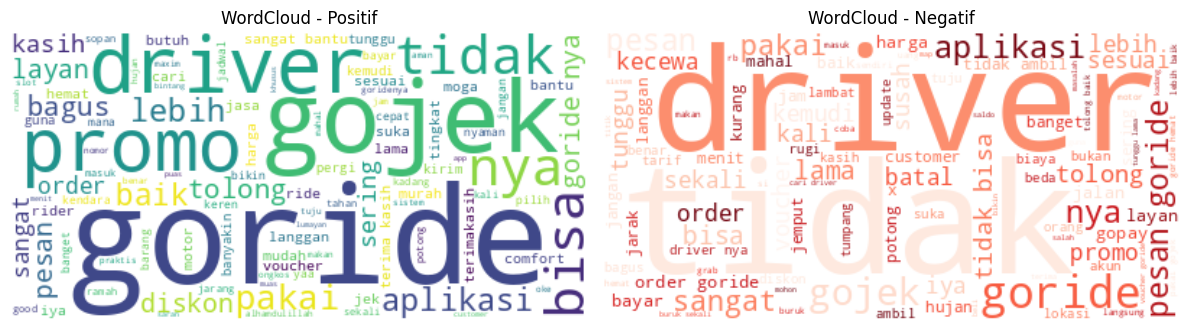

In [26]:
ulasan_positif = df[df['label'] == 1]['ulasan_bersih']
ulasan_negatif = df[df['label'] == 0]['ulasan_bersih']

text_positif = " ".join(ulasan_positif)
text_negatif = " ".join(ulasan_negatif)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(background_color='white', max_words=100).generate(text_positif)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positif')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(background_color='white', colormap='Reds', max_words=100).generate(text_negatif)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Negatif')

plt.tight_layout()
plt.show()


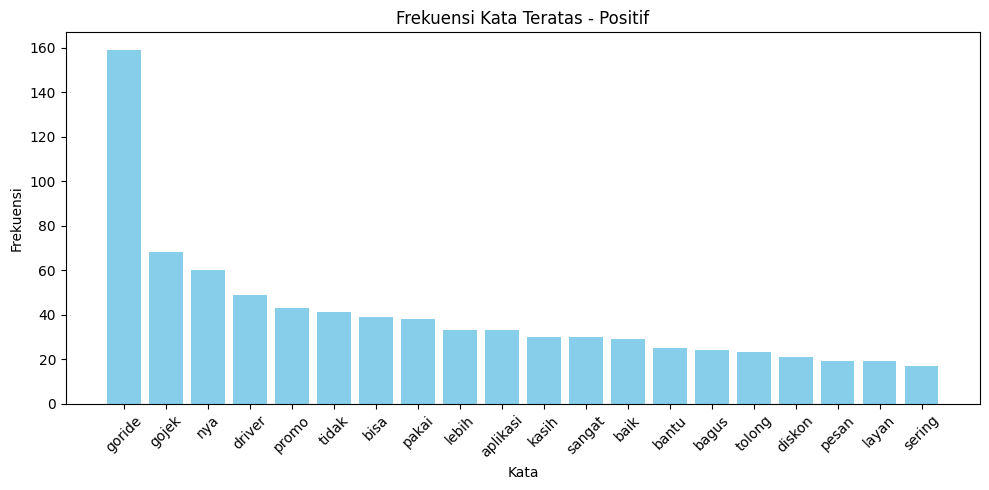

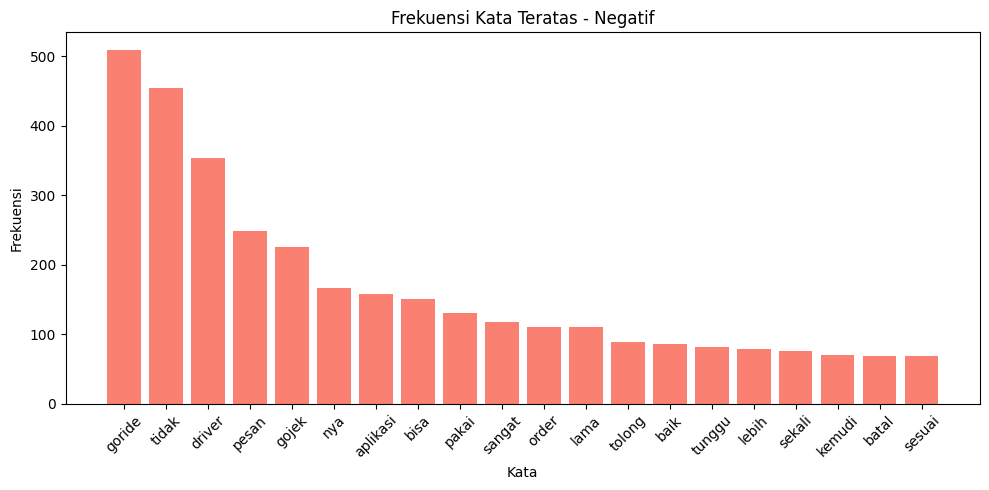

In [27]:
def plot_top_words(text_series, label_name, top_n=20):
    words = " ".join(text_series).split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(top_n)

    words, freqs = zip(*common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, freqs, color='skyblue' if label_name == 'positif' else 'salmon')
    plt.xticks(rotation=45)
    plt.title(f'Frekuensi Kata Teratas - {label_name.capitalize()}')
    plt.xlabel('Kata')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

plot_top_words(ulasan_positif, 'positif')
plot_top_words(ulasan_negatif, 'negatif')


In [29]:
def prediksi_manual(teks_list):
    for teks in teks_list:
        pred = grid_search.predict([teks])[0]
        proba = grid_search.predict_proba([teks])[0][1]
        label = "Positif" if pred == 1 else "Negatif"
        print(f"\n📝 Review: {teks}")
        print(f"🔮 Prediksi: {label}")
        print(f"📊 Confidence: {proba:.2%}")

# # Contoh penggunaan
# prediksi_manual([
#     "bagus bangettt pliss ih aku slalu dapet diskon goride jadi seribu🤩🤩🤩",
#     "tiap pesen go ride selalu lama dapetnya, mau ujan ato engga, selalu lama, nunggu sampe setengah jam lebih juga ngga dapet dapet, ngga rekomen buat yang lagi dikejar waktu, perbaiki tuh yang suka matiin aplikasi",
#     "makasih sudah menghadirkan goride hemat, kalau bisa banyakin promo yaww",
#     "Fitur chat tolong dikembalikan lagi. Ga bisa tempel fitur dari galeri. Biasanya saya pandu driver pake SS peta ke lokasi dituju supaya driver ga muter2 n salah Jalan. Maps nya masih ngawur arahnya Tolong ga ush update kalo maslaah yg sebelumnya belum terkondisikan n justru menurun.",
#     "untuk jenis goride di Purwakarta sudah oke dan sangat mudah untuk mencari driver"
# ])

# Contoh penggunaan
prediksi_manual([
    "selama saya menggunakan layanan goride pengemudinya bau, helm nya ngk ada",
    "goride baik",
    "baik"
])



📝 Review: selama saya menggunakan layanan goride pengemudinya bau, helm nya ngk ada
🔮 Prediksi: Negatif
📊 Confidence: 43.03%

📝 Review: goride baik
🔮 Prediksi: Negatif
📊 Confidence: 53.00%

📝 Review: baik
🔮 Prediksi: Negatif
📊 Confidence: 53.02%


In [30]:
# Analisis dataset dan distribusi kata "baik"
print("=== ANALISIS DATASET ===")
print(f"Total data: {len(df)}")
print(f"Distribusi label:")
print(df['label'].value_counts())
print(f"Persentase distribusi:")
print(df['label'].value_counts(normalize=True) * 100)

print("\n=== ANALISIS KATA 'BAIK' ===")
# Cari ulasan yang mengandung kata "baik"
baik_reviews = df[df['ulasan_bersih'].str.contains('baik', na=False)]
print(f"Jumlah ulasan dengan kata 'baik': {len(baik_reviews)}")
print(f"Distribusi label untuk ulasan dengan 'baik':")
print(baik_reviews['label'].value_counts())

print("\n=== CONTOH ULASAN DENGAN 'BAIK' ===")
print("NEGATIF:")
negatif_baik = baik_reviews[baik_reviews['label'] == 0]['ulasan_bersih'].head(5)
for i, ulasan in enumerate(negatif_baik, 1):
    print(f"{i}. {ulasan}")

print("\nPOSITIF:")
positif_baik = baik_reviews[baik_reviews['label'] == 1]['ulasan_bersih'].head(5)
for i, ulasan in enumerate(positif_baik, 1):
    print(f"{i}. {ulasan}")

# Cek TF-IDF weight untuk kata "baik"
tfidf_vectorizer = grid_search.best_estimator_.named_steps['tfidf']
feature_names = tfidf_vectorizer.get_feature_names_out()
if 'baik' in feature_names:
    baik_idx = list(feature_names).index('baik')
    print(f"\n=== TF-IDF ANALYSIS ===")
    print(f"Index kata 'baik' dalam features: {baik_idx}")
else:
    print("\nKata 'baik' tidak ditemukan dalam feature TF-IDF")

=== ANALISIS DATASET ===
Total data: 659
Distribusi label:
label
0    484
1    175
Name: count, dtype: int64
Persentase distribusi:
label
0    73.444613
1    26.555387
Name: proportion, dtype: float64

=== ANALISIS KATA 'BAIK' ===
Jumlah ulasan dengan kata 'baik': 103
Distribusi label untuk ulasan dengan 'baik':
label
0    80
1    23
Name: count, dtype: int64

=== CONTOH ULASAN DENGAN 'BAIK' ===
NEGATIF:
1. aneh voucher goride tidak muncul voucher muncul voucher baik tolong
2. sangat ganggu iklan timbul aplikasi jek hape tulis pesan telpon iklan muncul kerja kendala sangat bantu gojek baik goride mart
3. tolong perbaikin driver goride wilayah parung bogor pesan tuju rumah sekar tanjung batal driver milih milih jarak manajemen gojek indonesia tolong private message private message driver pilih pilih order cs tumpang private message kshan tumpang bayar bukan ngutang gojek training g benar wilayah parung bogor tanks
4. tolong pesan goride cari driver lokasi titik jemput sering banget driv

In [31]:
# Analisis singkat kata "baik"
baik_reviews = df[df['ulasan_bersih'].str.contains('baik', na=False)]
print(f"Total ulasan dengan 'baik': {len(baik_reviews)}")
print("Distribusi label:")
label_dist = baik_reviews['label'].value_counts()
print(f"Negatif (0): {label_dist.get(0, 0)}")
print(f"Positif (1): {label_dist.get(1, 0)}")
print(f"Persentase negatif: {label_dist.get(0, 0) / len(baik_reviews) * 100:.1f}%")

# Cek parameter model terbaik
print(f"\n=== MODEL PARAMETERS ===")
print(f"Best params: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

# Test prediksi dengan detail
print(f"\n=== DETAIL PREDIKSI ===")
test_cases = ["goride baik", "baik", "goride sangat baik"]
for text in test_cases:
    pred = grid_search.predict([text])[0]
    proba = grid_search.predict_proba([text])[0]
    print(f"'{text}' -> Pred: {pred}, Proba: [Neg: {proba[0]:.3f}, Pos: {proba[1]:.3f}]")

Total ulasan dengan 'baik': 103
Distribusi label:
Negatif (0): 80
Positif (1): 23
Persentase negatif: 77.7%

=== MODEL PARAMETERS ===
Best params: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best score: 0.7509

=== DETAIL PREDIKSI ===
'goride baik' -> Pred: 0, Proba: [Neg: 0.470, Pos: 0.530]
'baik' -> Pred: 0, Proba: [Neg: 0.470, Pos: 0.530]
'goride sangat baik' -> Pred: 1, Proba: [Neg: 0.144, Pos: 0.856]


In [33]:
# Debug detail mapping classes
print(f"\n=== DEBUG CLASSES & MAPPING ===")
print(f"Grid search classes: {grid_search.classes_}")
print(f"Best estimator classes: {grid_search.best_estimator_.classes_}")

# Test manual untuk memahami mapping
test_text = "goride baik"
pred_raw = grid_search.predict([test_text])[0]
proba_raw = grid_search.predict_proba([test_text])[0]

print(f"\n=== DETAIL DEBUG: '{test_text}' ===")
print(f"Classes: {grid_search.classes_}")
print(f"Raw prediction: {pred_raw}")
print(f"Raw probabilities: {proba_raw}")
print(f"Probability shape: {proba_raw.shape}")

# Manual mapping
for i, cls in enumerate(grid_search.classes_):
    print(f"Class {cls}: index {i}, probability {proba_raw[i]:.3f}")

# Cek decision function untuk SVM
decision_scores = grid_search.decision_function([test_text])[0]
print(f"Decision function score: {decision_scores}")
print(f"Decision > 0: {decision_scores > 0} (should be POSITIVE)")

# Bandingkan dengan argmax
predicted_class_idx = proba_raw.argmax()
predicted_class = grid_search.classes_[predicted_class_idx]
print(f"Argmax prediction: class index {predicted_class_idx} = {predicted_class}")
print(f"Max probability: {proba_raw.max():.3f}")

# Cek konsistensi
if proba_raw[1] > proba_raw[0]:
    expected_pred = 1
else:
    expected_pred = 0
    
print(f"Expected prediction based on max prob: {expected_pred}")
print(f"Actual prediction: {pred_raw}")
print(f"Consistent: {expected_pred == pred_raw}")


=== DEBUG CLASSES & MAPPING ===
Grid search classes: [0 1]
Best estimator classes: [0 1]

=== DETAIL DEBUG: 'goride baik' ===
Classes: [0 1]
Raw prediction: 0
Raw probabilities: [0.47001502 0.52998498]
Probability shape: (2,)
Class 0: index 0, probability 0.470
Class 1: index 1, probability 0.530
Decision function score: -0.025133400543681857
Decision > 0: False (should be POSITIVE)
Argmax prediction: class index 1 = 1
Max probability: 0.530
Expected prediction based on max prob: 1
Actual prediction: 0
Consistent: False


In [34]:
# ✅ PERBAIKAN: Gunakan argmax untuk prediksi yang konsisten
def prediksi_manual_fixed(teks_list):
    print("=== PREDIKSI DENGAN PERBAIKAN (Argmax Method) ===")
    for teks in teks_list:
        # Prediksi original (menggunakan decision function)
        pred_original = grid_search.predict([teks])[0]
        proba = grid_search.predict_proba([teks])[0]
        
        # Prediksi dengan argmax (lebih konsisten dengan probabilitas)
        pred_corrected = grid_search.classes_[proba.argmax()]
        
        # Decision function untuk debugging
        decision_score = grid_search.decision_function([teks])[0]
        
        print(f"\n📝 Review: {teks}")
        print(f"   Decision Score: {decision_score:.6f}")
        print(f"   Probabilities: [Neg: {proba[0]:.3f}, Pos: {proba[1]:.3f}]")
        print(f"   Original Pred (decision): {pred_original} ({'POSITIF' if pred_original == 1 else 'NEGATIF'})")
        print(f"   Fixed Pred (argmax): {pred_corrected} ({'POSITIF' if pred_corrected == 1 else 'NEGATIF'})")
        print(f"   Confidence: {proba[pred_corrected]:.3f} ({proba[pred_corrected]:.2%})")
        
        # Highlight jika ada perbedaan
        if pred_original != pred_corrected:
            print(f"   🔧 **PERBAIKAN APPLIED**: {pred_original} → {pred_corrected}")

# Test dengan cases yang bermasalah
test_cases = [
    "goride baik",
    "baik", 
    "goride sangat baik",
    "aplikasi buruk",
    "pelayanan memuaskan"
]

prediksi_manual_fixed(test_cases)

=== PREDIKSI DENGAN PERBAIKAN (Argmax Method) ===

📝 Review: goride baik
   Decision Score: -0.025133
   Probabilities: [Neg: 0.470, Pos: 0.530]
   Original Pred (decision): 0 (NEGATIF)
   Fixed Pred (argmax): 1 (POSITIF)
   Confidence: 0.530 (53.00%)
   🔧 **PERBAIKAN APPLIED**: 0 → 1

📝 Review: baik
   Decision Score: -0.025002
   Probabilities: [Neg: 0.470, Pos: 0.530]
   Original Pred (decision): 0 (NEGATIF)
   Fixed Pred (argmax): 1 (POSITIF)
   Confidence: 0.530 (53.02%)
   🔧 **PERBAIKAN APPLIED**: 0 → 1

📝 Review: goride sangat baik
   Decision Score: 0.296720
   Probabilities: [Neg: 0.144, Pos: 0.856]
   Original Pred (decision): 1 (POSITIF)
   Fixed Pred (argmax): 1 (POSITIF)
   Confidence: 0.856 (85.64%)

📝 Review: aplikasi buruk
   Decision Score: -0.527559
   Probabilities: [Neg: 0.923, Pos: 0.077]
   Original Pred (decision): 0 (NEGATIF)
   Fixed Pred (argmax): 0 (NEGATIF)
   Confidence: 0.923 (92.26%)

📝 Review: pelayanan memuaskan
   Decision Score: -0.050880
   Probabili

In [32]:
joblib.dump(grid_search, '../models/svm_model_predict_notebook.pkl')
joblib.dump(grid_search.best_estimator_.named_steps['tfidf'], '../models/tfidf_vectorizer_predict_notebook.pkl')
print("✅ Model dan vectorizer berhasil disimpan.")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")


✅ Model dan vectorizer berhasil disimpan.
Best Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Score: 0.7509
